# Housing Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'/Users/xuhaomin/Desktop/Artificial Intelligence/Kaggle/Kaggle_housing_prices_v2.0/Housing prices'

In [3]:
# Load the data

iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)

In [4]:
# view the head of data

home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


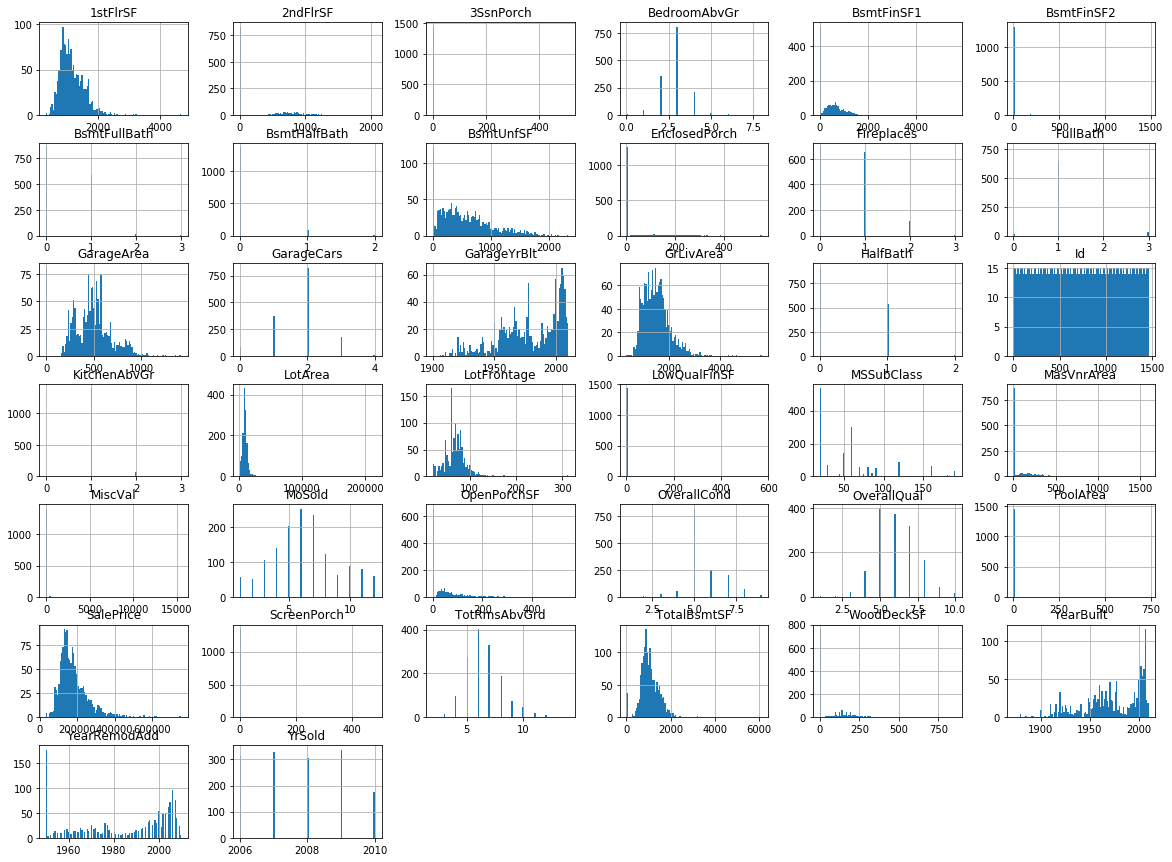

In [7]:
home_data.hist(bins=100, figsize=(20, 15))
plt.show()

In [8]:
# Detect the columns with missing values
# pd.DataFrame.isnull(self) --> Return a boolean same-sized object indicating if the values are null.

missing_val_count_by_column = home_data.isnull().sum(axis=0)
print(missing_val_count_by_column[missing_val_count_by_column>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
# Find the colunms with missing data

cols_with_missing = [col for col in home_data.columns if home_data[col].isnull().any()]
print(np.shape(cols_with_missing))

(19,)


In [10]:
# simple drop columns with missing values

data_without_missing_value = home_data.dropna(axis=1)

# another way to drop the columns:
# home_data.drop(cols_with_missing, axis=1)

In [11]:
def generate_impute(original_data):
    # make copy to avoid changing original data when imputing
    new_home_data = original_data.copy()

    # create extra columns to tell the model about the value added in later to make better predictions
    for col in cols_with_missing:
        new_home_data[col + '_was_missing'] = new_home_data[col].isnull()

    # imputation
    from sklearn.preprocessing import Imputer

    my_imputer = Imputer()
    new_home_data_imputed = pd.DataFrame(my_imputer.fit_transform(new_home_data.select_dtypes(exclude=['object'])))
    new_home_data_imputed.columns = new_home_data.select_dtypes(exclude=['object']).columns
    print('The shape of original home_data:', np.shape(home_data.columns))
    print('The shape of the copy of original data without string value columns:', np.shape(new_home_data.select_dtypes(exclude=['object']).columns))
    print('The shape of imputed data:', np.shape(new_home_data_imputed.columns))
    print('\nNote: imputed data only have numerical data')
    
    return new_home_data_imputed

In [12]:
def one_hot(data):
    from sklearn.preprocessing import Imputer
    my_imputer = Imputer()
    
    new_data = data.copy()
    one_hot_encoded_training_predictors = pd.get_dummies(new_data)
    new_data = pd.DataFrame(my_imputer.fit_transform(one_hot_encoded_training_predictors))
    
    return new_data

def data_pre(data):
    y = data.SalePrice
    X = data.drop(['SalePrice'], axis=1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

    return X_train, X_val, y_train, y_val, X, y

In [13]:
# Data preparation with imputation on only numerical data
new_home_data_imputed = generate_impute(home_data)
X_train, X_val, y_train, y_val, X, y= data_pre(new_home_data_imputed)

# Data preparation with one hot implementation on all object data and imputation
#y = home_data.SalePrice
#X = home_data.drop(['SalePrice'], axis=1)
#X = one_hot(X)
#X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

The shape of original home_data: (81,)
The shape of the copy of original data without string value columns: (57,)
The shape of imputed data: (57,)

Note: imputed data only have numerical data


In [14]:
def RF(X_train, X_val, y_train, y_val):
    rf_model = RandomForestRegressor(random_state=1)
    rf_model.fit(X_train, y_train)
    rf_val_predictions = rf_model.predict(X_val)
    rf_val_mae = mean_absolute_error(rf_val_predictions, y_val)

    return print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

def my_xgboost(X_train, X_val, y_train, y_val, ne=150, lr=0.097):
    # from xgboost import XGBRegressor
    
    my_model = XGBRegressor(n_estimators=ne, learning_rate=lr)
    my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)
    val_predictions = my_model.predict(X_val)
    val_mae = mean_absolute_error(val_predictions, y_val)
    print("Validation MAE for xgboost: {:,.0f}".format(val_mae)) 
    
    return my_model

RF(X_train, X_val, y_train, y_val)
my_xgboost_model = my_xgboost(X_train, X_val, y_train, y_val)

Validation MAE for Random Forest Model: 18,944
Validation MAE for xgboost: 15,151


## Make Predictions on Test Set

In [15]:
# Load test data
test_data_path = 'test.csv'

test_data = pd.read_csv(test_data_path)
new_test_data = generate_impute(test_data)

features = list(X.columns)
X_test = new_test_data[features]

test_preds = my_xgboost_model.predict(X_test)

The shape of original home_data: (81,)
The shape of the copy of original data without string value columns: (56,)
The shape of imputed data: (56,)

Note: imputed data only have numerical data


In [16]:
# Generate test output to a csv file

output = pd.DataFrame({'Id': test_data.Id,
                      'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

## Partial Dependence Plots

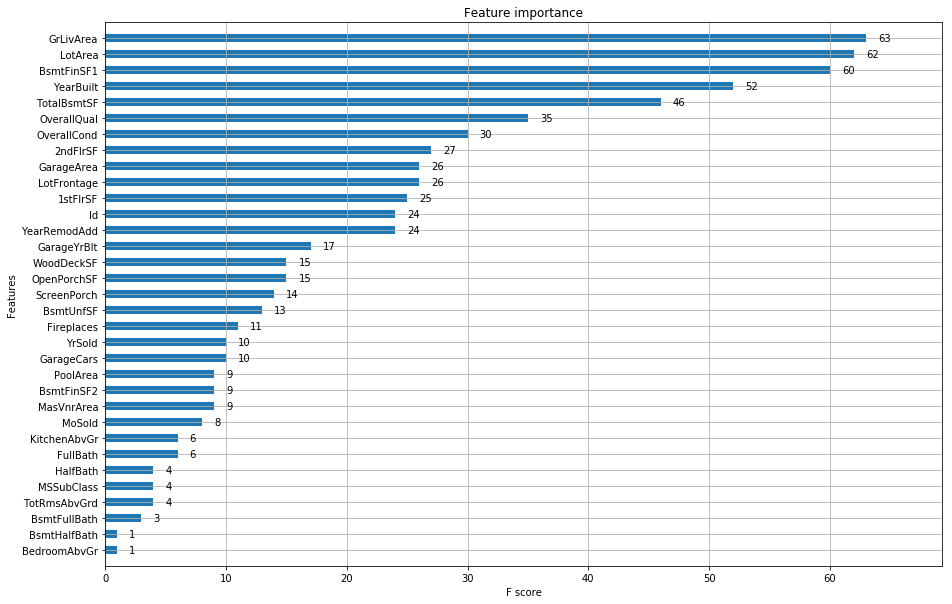

In [17]:
from xgboost import plot_importance


features_to_use = ['LotArea', 'YearBuilt']

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plot_importance(my_xgboost_model, importance_type="weight", height=0.5)
